<div align='center'>
   <h1>DATA VISUALISATION BLOOD</h1>
</dic>

In [1]:
# import lib
import os
import numpy as np
import pandas as pd
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Normalization
import tensorflow.keras.layers as tfl

from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity

In [3]:
# Chemin principal
base_output_path = r"C:\Users\hp\Downloads\data_blood_labled"

In [2]:
import os

# Chemin principal
base_output_path = r"C:\Users\hp\Downloads\data_blood_labled"

# Groupes sanguins
blood_groups = ["A+", "A-", "B+", "B-", "AB+", "AB-", "O+", "O-"]

# Créer les dossiers
for group in blood_groups:
    os.makedirs(os.path.join(base_output_path, group), exist_ok=True)


In [4]:
# Mapping des classes YOLO vers les noms
classes = [0, 1, 2]

# Fonction pour déterminer le groupe sanguin
def determine_blood_group(detected_classes):
    is_A = 0 in detected_classes
    is_B = 1 in detected_classes
    is_D = 2 in detected_classes

    if is_A and is_B and is_D:
        return "AB+"
    elif is_A and is_B:
        return "AB-"
    elif is_A and is_D:
        return "A+"
    elif is_B and is_D:
        return "B+"
    elif is_A:
        return "A-"
    elif is_B:
        return "B-"
    elif is_D:
        return "O+"
    else:
        return "O-"

In [5]:
# Dossier contenant train, val, test
dataset_path = r"C:\Users\hp\Downloads\Blood Group Detection.v4i.yolov11"

# Organiser les fichiers
def organize_files(input_path, output_path):
    for split in ["train", "valid", "test"]:
        images_path = os.path.join(input_path, split, "images")
        labels_path = os.path.join(input_path, split, "labels")

        for label_file in os.listdir(labels_path):
            label_path = os.path.join(labels_path, label_file)
            detected_classes = set()

            # Lire les classes depuis le fichier YOLO
            with open(label_path, "r") as f:
                for line in f.readlines():
                    class_id = int(line.split()[0])  # ID de la classe (0, 1, ou 2)
                    detected_classes.add(class_id)

            # Déterminer le groupe sanguin
            blood_group = determine_blood_group(detected_classes)

            # Déplacer l'image vers le dossier correspondant
            image_file = label_file.replace(".txt", ".jpg")  # Supposer que l'extension est .jpg
            image_source_path = os.path.join(images_path, image_file)
            image_target_path = os.path.join(output_path, blood_group, image_file)

            if os.path.exists(image_source_path):
                shutil.copy(image_source_path, image_target_path)
                print(f"Image {image_file} déplacée vers {blood_group}")


In [6]:
# run the code :
organize_files(dataset_path, base_output_path)

Image A-1-_jpg.rf.146d6d5c564586e8c74bc0c8176c9355.jpg déplacée vers A+
Image A-1-_jpg.rf.53936e34b1da56c54f71d7ed745c3d16.jpg déplacée vers A-
Image A-1-_jpg.rf.5936b1ad0afd174ca963c619f144e4c8.jpg déplacée vers A+
Image A-1-_jpg.rf.5a3432505f2540885bc1ab74a75ee37a.jpg déplacée vers A-
Image A-1-_jpg.rf.73ab7bbcf2ceab733bd6f413b5b789e3.jpg déplacée vers A+
Image A-1-_jpg.rf.879a35e53903bcc1a521ab23e131810d.jpg déplacée vers A+
Image A-1-_jpg.rf.d83e96ed2f2c6f34ff1d39235e95f4aa.jpg déplacée vers A+
Image A-1-_jpg.rf.dbf250a5441f26b543c9a935074344ff.jpg déplacée vers A+
Image A-1-_jpg.rf.dc6a4dde3a4d9f80afaf6cfa0bec2751.jpg déplacée vers A-
Image A-10-_jpg.rf.0bc4468aa263db56d4a8db7424a41dc3.jpg déplacée vers A-
Image A-10-_jpg.rf.3b45f17130e872ee01f1000b8c79c4fc.jpg déplacée vers A+
Image A-10-_jpg.rf.66b7799050b3918bd353c9893a33424d.jpg déplacée vers A+
Image A-10-_jpg.rf.841a8680ac016500b02e2b4bef9f90f8.jpg déplacée vers A-
Image A-10-_jpg.rf.88049d9e8395d530f26e5047cffb401b.jpg dépl

In [6]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\hp\Downloads\data_blood_labled",  # Le dossier contenant les images
    labels="inferred",  # Utilisation des labels existants dans les sous-dossiers
    label_mode="categorical",  # Les labels en one-hot encoding
    image_size=(224, 224),  # Redimensionner les images
    shuffle=True,
    seed=42
)

Found 5675 files belonging to 8 classes.


In [9]:
# Dossier contenant train, val, test
dataset_path = r"C:\Users\hp\Downloads\Blood Group Detection.v3i.yolov11"

# Organiser les fichiers
def organize_files(input_path, output_path):
    for split in ["train"]:
        images_path = os.path.join(input_path, split, "images")
        labels_path = os.path.join(input_path, split, "labels")

        for label_file in os.listdir(labels_path):
            label_path = os.path.join(labels_path, label_file)
            detected_classes = set()

            # Lire les classes depuis le fichier YOLO
            with open(label_path, "r") as f:
                for line in f.readlines():
                    class_id = int(line.split()[0])  # ID de la classe (0, 1, ou 2)
                    detected_classes.add(class_id)

            # Déterminer le groupe sanguin
            blood_group = determine_blood_group(detected_classes)

            # Déplacer l'image vers le dossier correspondant
            image_file = label_file.replace(".txt", ".jpg")  # Supposer que l'extension est .jpg
            image_source_path = os.path.join(images_path, image_file)
            image_target_path = os.path.join(output_path, blood_group, image_file)

            if os.path.exists(image_source_path):
                shutil.copy(image_source_path, image_target_path)
                print(f"Image {image_file} déplacée vers {blood_group}")

In [10]:
# run the code :
organize_files(dataset_path, base_output_path)

Image A-1-_jpg.rf.0fe43bc1165f10121f0bc22485434e9d.jpg déplacée vers A-
Image A-1-_jpg.rf.203c714280d72acba6364c55356a17d6.jpg déplacée vers A+
Image A-1-_jpg.rf.4137415195a6b50000f0212ae34695f3.jpg déplacée vers A+
Image A-1-_jpg.rf.b54960cbacaf3ac8db181dd17a39cbd3.jpg déplacée vers A-
Image A-10-_jpg.rf.101ac0d42185282091053627faf540f9.jpg déplacée vers A-
Image A-10-_jpg.rf.36e4416d194956df7c9b577521f1488d.jpg déplacée vers A+
Image A-10-_jpg.rf.425b7630c12733a6ddbc78a057f0bddf.jpg déplacée vers A-
Image A-10-_jpg.rf.8d2277f8f6d70bf797e9258d914f52d3.jpg déplacée vers A+
Image A-100-_jpg.rf.157afac8a6d33725225ffe1aa59a7ba5.jpg déplacée vers A+
Image A-100-_jpg.rf.34dbaa2dfedaa2b4d82a530ad40c2754.jpg déplacée vers A+
Image A-100-_jpg.rf.b74d3bf0905d0746dd9d1a674767d1fd.jpg déplacée vers A-
Image A-100-_jpg.rf.d574e83aa04d28d2334cd7ad2119f397.jpg déplacée vers A-
Image A-101-_jpg.rf.1a6183a1b1d8e958a2be11c8aae60b8f.jpg déplacée vers A-
Image A-101-_jpg.rf.7462fe3d77c30af517455212dc879f

In [11]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\hp\Downloads\data_blood_labled",  # Le dossier contenant les images
    labels="inferred",  # Utilisation des labels existants dans les sous-dossiers
    label_mode="categorical",  # Les labels en one-hot encoding
    image_size=(224, 224),  # Redimensionner les images
    shuffle=True,
    seed=42
)

Found 8040 files belonging to 8 classes.


In [12]:
# Dossier contenant train, val, test
dataset_path = r"C:\Users\hp\Downloads\Blood Group Detection.v2i.yolov11"

# Organiser les fichiers
def organize_files(input_path, output_path):
    for split in ["train"]:
        images_path = os.path.join(input_path, split, "images")
        labels_path = os.path.join(input_path, split, "labels")

        for label_file in os.listdir(labels_path):
            label_path = os.path.join(labels_path, label_file)
            detected_classes = set()

            # Lire les classes depuis le fichier YOLO
            with open(label_path, "r") as f:
                for line in f.readlines():
                    class_id = int(line.split()[0])  # ID de la classe (0, 1, ou 2)
                    detected_classes.add(class_id)

            # Déterminer le groupe sanguin
            blood_group = determine_blood_group(detected_classes)

            # Déplacer l'image vers le dossier correspondant
            image_file = label_file.replace(".txt", ".jpg")  # Supposer que l'extension est .jpg
            image_source_path = os.path.join(images_path, image_file)
            image_target_path = os.path.join(output_path, blood_group, image_file)

            if os.path.exists(image_source_path):
                shutil.copy(image_source_path, image_target_path)
                print(f"Image {image_file} déplacée vers {blood_group}")


In [13]:
# run the code :
organize_files(dataset_path, base_output_path)

Image A-1-_jpg.rf.0fe43bc1165f10121f0bc22485434e9d.jpg déplacée vers A-
Image A-1-_jpg.rf.1aea7b054cabd517caf0b0f0ebe62937.jpg déplacée vers A-
Image A-1-_jpg.rf.203c714280d72acba6364c55356a17d6.jpg déplacée vers A+
Image A-1-_jpg.rf.2345795166d62127b6daebb85f48a4fb.jpg déplacée vers A-
Image A-1-_jpg.rf.242dc469994c46881acbd8fb1c8409c6.jpg déplacée vers A-
Image A-1-_jpg.rf.29dd3a566293ab92ab4c89f0e770d725.jpg déplacée vers A+
Image A-1-_jpg.rf.2f8d7e95e3807d546e7f9a191599bf95.jpg déplacée vers A+
Image A-1-_jpg.rf.4137415195a6b50000f0212ae34695f3.jpg déplacée vers A+
Image A-1-_jpg.rf.994991a06a14d2eabcd86609fd23eab4.jpg déplacée vers A+
Image A-1-_jpg.rf.a47f56c44217fd57a55a8bb384299fb7.jpg déplacée vers A-
Image A-1-_jpg.rf.b54960cbacaf3ac8db181dd17a39cbd3.jpg déplacée vers A-
Image A-1-_jpg.rf.decbe92f245027949903d088d990316f.jpg déplacée vers A+
Image A-10-_jpg.rf.101ac0d42185282091053627faf540f9.jpg déplacée vers A-
Image A-10-_jpg.rf.1923352e5f6e223eaadca98007dd1397.jpg déplacé

In [14]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\hp\Downloads\data_blood_labled",  # Le dossier contenant les images
    labels="inferred",  # Utilisation des labels existants dans les sous-dossiers
    label_mode="categorical",  # Les labels en one-hot encoding
    image_size=(224, 224),  # Redimensionner les images
    shuffle=True,
    seed=42
)

Found 12770 files belonging to 8 classes.


In [15]:
# Dossier contenant train, val, test
dataset_path = r"C:\Users\hp\Downloads\Blood Group Detection.v1i.yolov11"

# Organiser les fichiers
def organize_files(input_path, output_path):
    for split in ["train", "valid", "test"]:
        images_path = os.path.join(input_path, split, "images")
        labels_path = os.path.join(input_path, split, "labels")

        for label_file in os.listdir(labels_path):
            label_path = os.path.join(labels_path, label_file)
            detected_classes = set()

            # Lire les classes depuis le fichier YOLO
            with open(label_path, "r") as f:
                for line in f.readlines():
                    class_id = int(line.split()[0])  # ID de la classe (0, 1, ou 2)
                    detected_classes.add(class_id)

            # Déterminer le groupe sanguin
            blood_group = determine_blood_group(detected_classes)

            # Déplacer l'image vers le dossier correspondant
            image_file = label_file.replace(".txt", ".jpg")  # Supposer que l'extension est .jpg
            image_source_path = os.path.join(images_path, image_file)
            image_target_path = os.path.join(output_path, blood_group, image_file)

            if os.path.exists(image_source_path):
                shutil.copy(image_source_path, image_target_path)
                print(f"Image {image_file} déplacée vers {blood_group}")


In [16]:
# run the code :
organize_files(dataset_path, base_output_path)

Image A-10-_jpg.rf.101ac0d42185282091053627faf540f9.jpg déplacée vers A-
Image A-10-_jpg.rf.16e451374ed44dc9a95ad06410dd9284.jpg déplacée vers A-
Image A-10-_jpg.rf.1f3f4c871d4c83c7a2719d194d7e4d5a.jpg déplacée vers A-
Image A-10-_jpg.rf.8d2277f8f6d70bf797e9258d914f52d3.jpg déplacée vers A+
Image A-10-_jpg.rf.9db5459a10cada23b8e09534a93e9b01.jpg déplacée vers A+
Image A-10-_jpg.rf.f5493e4a3c7e32598bc364340e5b3320.jpg déplacée vers A+
Image A-100-_jpg.rf.3dcebe83244a4ea02e9f165829f54d7d.jpg déplacée vers A-
Image A-100-_jpg.rf.b32ccbf86dc099c752e965583892b1a8.jpg déplacée vers A-
Image A-100-_jpg.rf.b74d3bf0905d0746dd9d1a674767d1fd.jpg déplacée vers A-
Image A-101-_jpg.rf.0b912d650fc51669fc3fe7fba11b0848.jpg déplacée vers A-
Image A-101-_jpg.rf.1a6183a1b1d8e958a2be11c8aae60b8f.jpg déplacée vers A-
Image A-101-_jpg.rf.e0777b8aa1ad36d1e34fadc15484f9a5.jpg déplacée vers A-
Image A-102-_jpg.rf.019aa1ee5415232dc268460ab6014bbe.jpg déplacée vers A-
Image A-102-_jpg.rf.316376074a90b4cb7ea55167

### **DATA LOADER :**

In [2]:
batch_size = 32
image_height = 220
image_width = 220

In [3]:
# Load the data :
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\hp\Downloads\data_blood_labled", # the directoryy
    labels = "inferred", # using the labels that exist in the folderss
    label_mode = "categorical", #one hot
    batch_size = batch_size,
    image_size = (image_height, image_width),
    shuffle = True,
    seed = 42,
    validation_split = 0.2,
    subset = "training"
)

ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\hp\Downloads\data_blood_labled", # the directoryy
    labels = "inferred", # using the labels that exist in the folderss
    label_mode = "categorical", #one hot
    batch_size = batch_size,
    image_size = (image_height, image_width),
    shuffle = True,
    seed = 42,
    validation_split = 0.2,
    subset = "validation"
)

Found 14962 files belonging to 8 classes.
Using 11970 files for training.
Found 14962 files belonging to 8 classes.
Using 2992 files for validation.


In [4]:
# devide the val data set into val and test data set 
val_batches = tf.data.experimental.cardinality(ds_val)
ds_test = ds_val.take(val_batches // 2)
ds_validation = ds_val.skip(val_batches // 2)

In [5]:
# displaying the shapes :
print('the number of batches in train set :', tf.data.experimental.cardinality(ds_train))
print('the number of batches in validation set :', tf.data.experimental.cardinality(ds_validation))
print('the number of batches in test set :', tf.data.experimental.cardinality(ds_test))

the number of batches in train set : tf.Tensor(375, shape=(), dtype=int64)
the number of batches in validation set : tf.Tensor(47, shape=(), dtype=int64)
the number of batches in test set : tf.Tensor(47, shape=(), dtype=int64)


In [6]:
# displaying the range of labeles :
print('the labels are :', ds_train.class_names)

the labels are : ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


In [7]:
# image visualisation :

# initialization of a dictionary that contient 10 images by class 
images_by_class = {} 

for images, labels in ds_train :
    for image, label in zip(images, labels):
        label = tf.argmax(label).numpy()
        if label not in images_by_class:
            images_by_class[label] = []
        if len(images_by_class[label]) < 10 :
            images_by_class[label].append(image.numpy())

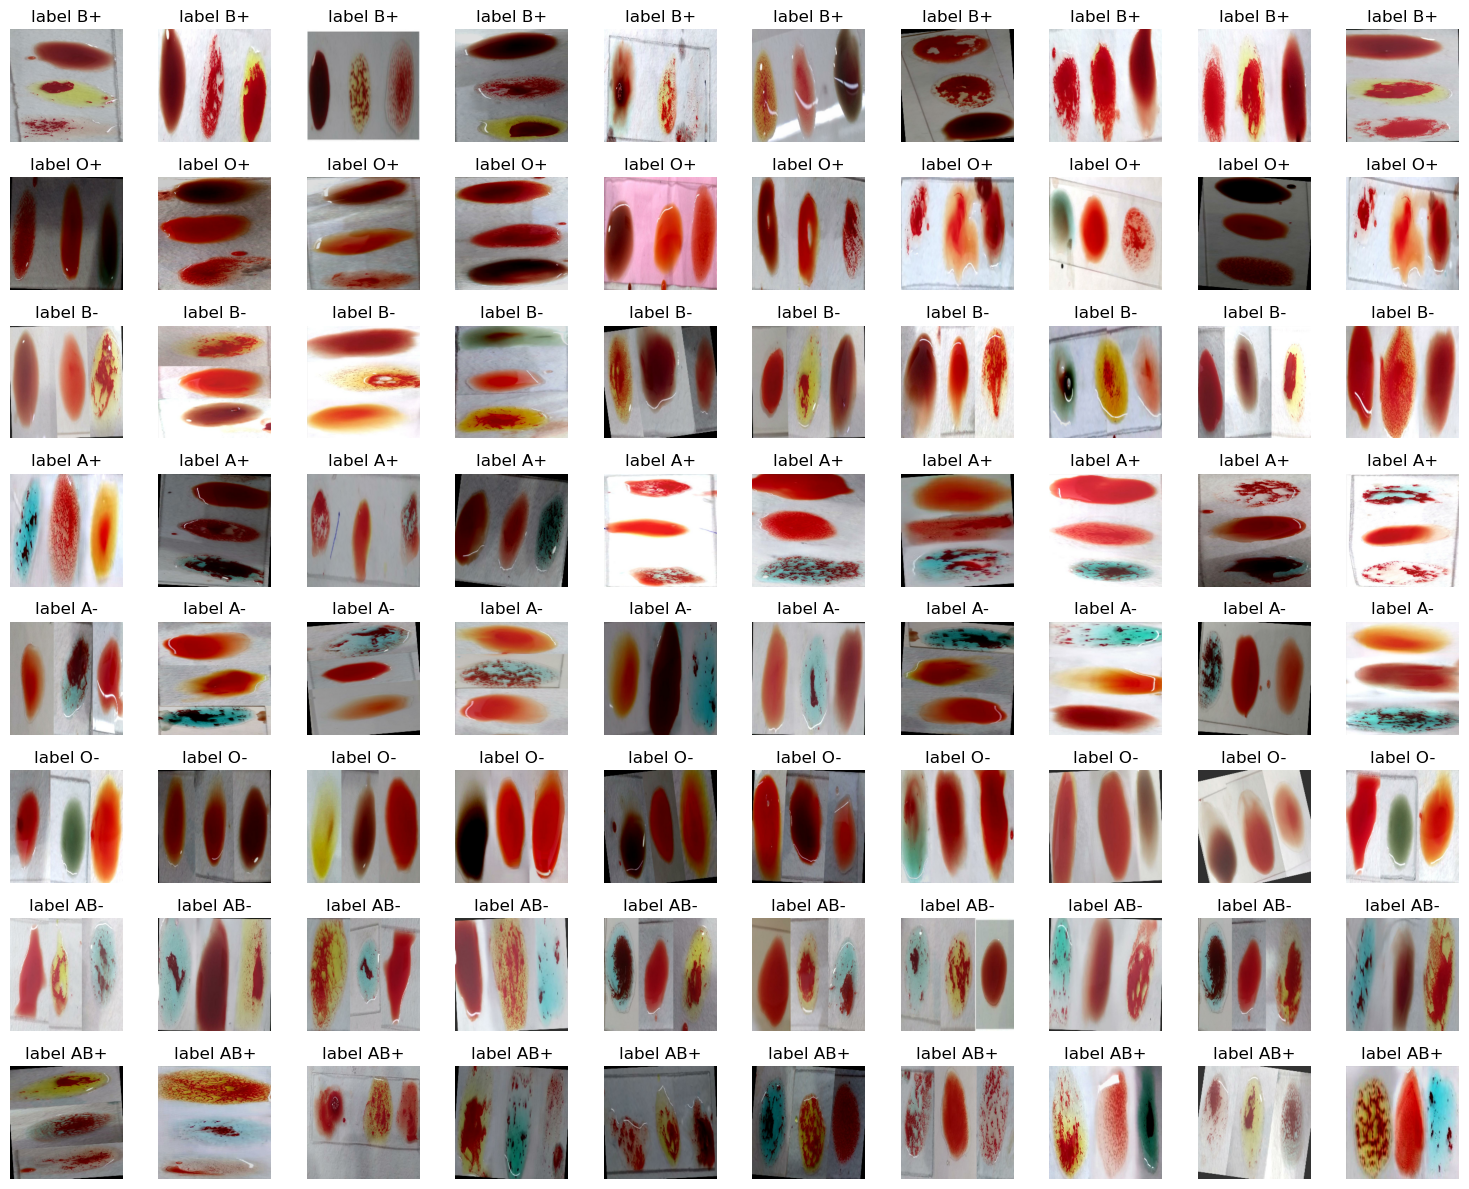

In [8]:
# create the visuals :
total_images = len(images_by_class) * 10 
cols = 10
rows = (total_images // cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
index = 0

for label, images in images_by_class.items():
    for image in images:
        ax = axes.flat[index]
        ax.imshow(image.astype("uint8"))
        ax.axis('off')
        ax.set_title(f"label {ds_train.class_names[label]}")
        index += 1

plt.tight_layout()
plt.show()

### **DATA VISUALIZATION :**

In [9]:
# Load the data :
ds_visualization = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\hp\Downloads\data_blood_labled", # the directoryy
    labels = "inferred", # using the labels that exist in the folderss
    label_mode = "categorical", #one hot
    image_size = (image_height, image_width),
    shuffle = True,
    seed = 42
)

Found 14962 files belonging to 8 classes.


In [10]:
# extract the labels:
labels = []
for _, label in ds_visualization:
    for i in label:
        labels.append(i)

labels = np.array(labels)
print(f"Shape of labels: {labels.shape}")

Shape of labels: (14962, 8)


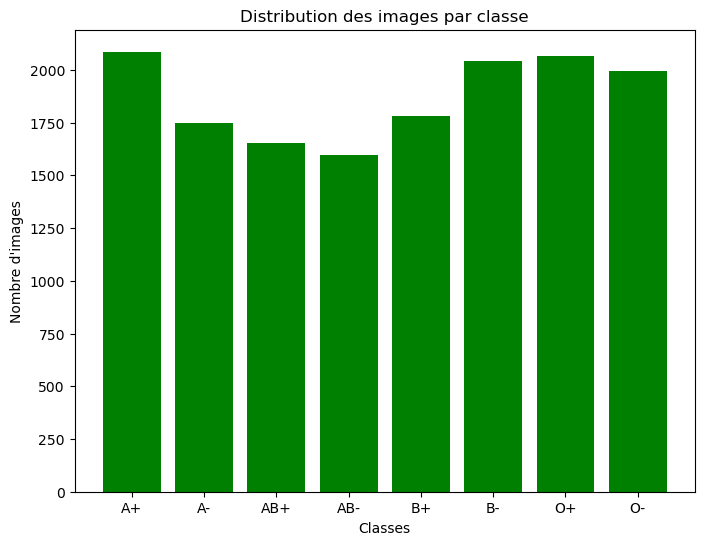

In [11]:
# one hot --> indices
labels_indices = [np.argmax(label) for label in labels]

# compute the number of images in each class
unique, counts = np.unique(labels_indices, return_counts=True)

# define the class names :
class_names = ds_visualization.class_names

# visuaa
plt.figure(figsize=(8, 6))
plt.bar(unique, counts, tick_label=[class_names[i] for i in unique], color='green')
plt.xlabel('Classes')
plt.ylabel('Nombre d\'images')
plt.title('Distribution des images par classe')
plt.xticks(unique)  # Pour afficher les classes sur l'axe des x
plt.show()

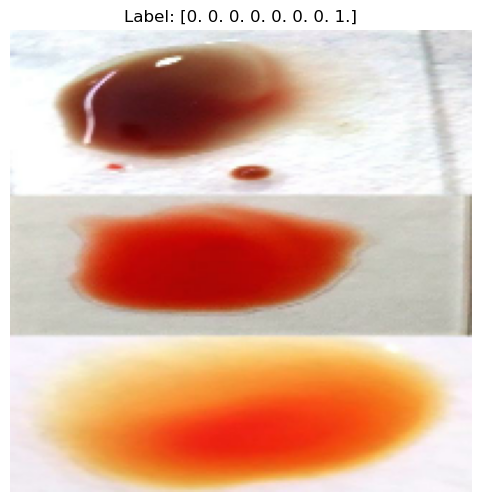

In [66]:
# Visualize the image
plt.figure(figsize=(6, 6))
plt.imshow(img_resized.numpy().astype("uint8"))
plt.title(f"Label: {lb.numpy()}")
plt.axis('off')
plt.show()

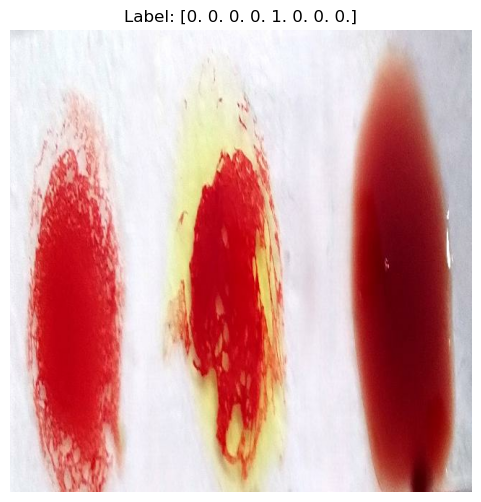

In [56]:
# Visualize the image
plt.figure(figsize=(6, 6))
plt.imshow(img.numpy().astype("uint8"))
plt.title(f"Label: {lb.numpy()}")
plt.axis('off')
plt.show()